In [60]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np
from pandas import json_normalize 
import pandas as pd
# from sklearn import cluster
from sklearn import metrics

from sklearn.cluster import KMeans

import json
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [24]:
import nltk
from nltk.corpus import stopwords
import re

In [23]:
stops = stopwords.words("russian")

In [7]:

q_n_a = {}
with open("dictionaries\q_a.json", 'r', encoding="utf-8") as f:
    q_n_a = json.load(f)

In [9]:
data = []

for value in q_n_a:
    # print(value)
    data.append({"question": q_n_a[value]["question"], "answer": q_n_a[value]["response"]})

In [45]:

df = pd.DataFrame(data)

In [37]:
df.dropna(how="all", axis=0).head()

,question,answer
0,Добрый день. Когда мне было 21 год я предложил...,
1,,
2,,
3,спрашивает: Евгений (неуказан)Здравствуйте.Мен...,Здавствуйте! Может быть этот вопрос обсудить с...
4,спрашивает: Нина (неуказан)Здравствуйте! Для ч...,"Здравствуйте, Нина.\nВас легко понять.\nЕсли в..."


In [38]:
def preprocess_text(text: str, remove_stopwords: bool):
    text = re.sub("[^А-я]+", " ", text)
    if remove_stopwords:
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if not w.lower() in stops]
        text = " ".join(tokens)
    text = text.lower().strip()
    return text

In [46]:
df["quesion_clean"] = df["question"].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [48]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['quesion_clean'])

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [93]:
trouble = "Здравствуйте! Для чего психолог предложил дочери представить себя посудой, растением, оружием, украшением и нарисовать рисунок. Те, кто считает себя специалистами, тоже люди разные. Эта психолог очень молодая, мне как матери нужно объяснение этого теста.Дочь уже взрослый человек, у нее есть проблема созависимости с мужем.Так в чем смысл этого теста?"

In [72]:
clusters = kmeans.labels_

In [73]:
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [74]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [75]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
травматические,экзистенциальные,ориентированное,интегральная,написанием,отклонения,психологическое,пост,лайф,расстройства

Cluster 1
знаю,москва,могу,года,лет,здравствуйте,очень,делать,это,спрашивает

Cluster 2
психокоррекции,депрессивные,партн,невротические,внутриличностного,дистантные,ром,кпт,отношения,состояния

Cluster 3
года,жизни,могу,работа,групп,очень,спрашивает,это,лет,психолог


In [76]:
# map clusters to appropriate labels 
cluster_map = {0: "0", 1: "1", 2: "2", 3: "3"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

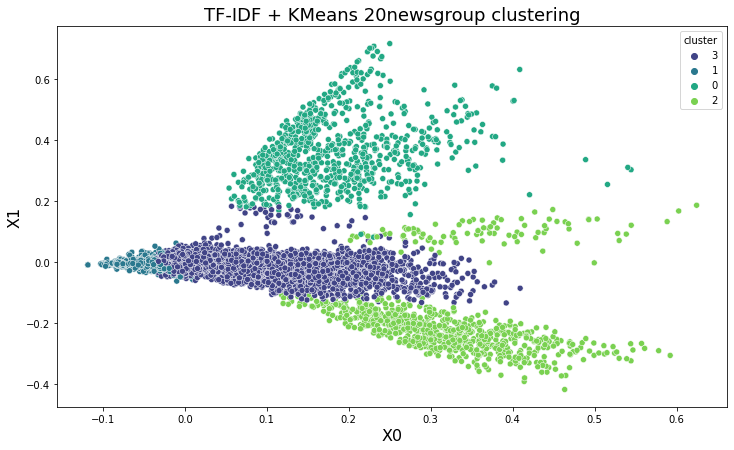

In [77]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [78]:
df

,question,answer,quesion_clean,cluster,x0,x1
0,Добрый день. Когда мне было 21 год я предложил...,,добрый день год предложила своему парню другу ...,3,0.010581,0.005124
1,,,,1,-0.118202,-0.009536
2,,,,1,-0.118202,-0.009536
3,спрашивает: Евгений (неуказан)Здравствуйте.Мен...,Здавствуйте! Может быть этот вопрос обсудить с...,спрашивает евгений неуказан здравствуйте зовут...,3,-0.021312,0.015413
4,спрашивает: Нина (неуказан)Здравствуйте! Для ч...,"Здравствуйте, Нина.\nВас легко понять.\nЕсли в...",спрашивает нина неуказан здравствуйте психолог...,1,-0.049789,-0.009410
...,...,...,...,...,...,...
14241,,,,1,-0.118202,-0.009536
14242,спрашивает: Антонина (Москва)Здравствуйте! Так...,Обычно любовь она достаточно спокойная. Часто ...,спрашивает антонина москва здравствуйте вопрос...,3,0.134772,-0.040952
14243,,,,1,-0.118202,-0.009536
14244,,,,1,-0.118202,-0.009536


In [81]:
df.to_parquet("questions.parquet", index=None)

In [89]:
df[df["cluster"] == '3']["answer"]

0                                                         
3        Здавствуйте! Может быть этот вопрос обсудить с...
19       Добрый день, Елена!\nОтношения (и дружеские, и...
92       Ольга, случай ваш  с выходом на откровенные се...
110      Если жить не хочется, значит, по-виимому, гото...
                               ...                        
14232    Нужна любимая, добрая, понимающая мама и огром...
14236    Здравствуйте, Галина! Да, такое встречается в ...
14239    Здравствуйте,Надежда.Я думаю,вопрос звучит гор...
14240    Анастасия, вам очевидным образом  нужны НЕ "ус...
14242    Обычно любовь она достаточно спокойная. Часто ...
Name: answer, Length: 4913, dtype: object